<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Zac/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto = 'BTC'
currency = 'INR'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-18,7.314907e+05,7.254785e+05,7.349759e+05,7.259610e+05,1.151007e+12,7.259610e+05
2019-09-19,7.350398e+05,7.033428e+05,7.261210e+05,7.329512e+05,1.423414e+12,7.329512e+05
2019-09-20,7.324158e+05,7.214724e+05,7.329443e+05,7.249939e+05,1.049163e+12,7.249939e+05
2019-09-21,7.254537e+05,7.121104e+05,7.251369e+05,7.134639e+05,9.559595e+11,7.134639e+05
2019-09-22,7.173071e+05,7.064909e+05,7.137771e+05,7.170186e+05,9.398239e+11,7.170186e+05
...,...,...,...,...,...,...
2021-06-25,2.631060e+06,2.325729e+06,2.571378e+06,2.347012e+06,2.984483e+12,2.347012e+06
2021-06-26,2.421182e+06,2.239202e+06,2.343814e+06,2.387702e+06,2.862412e+12,2.387702e+06
2021-06-27,2.572195e+06,2.379206e+06,2.395213e+06,2.571714e+06,2.635691e+12,2.571714e+06


In [6]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [7]:
pred_days = 30 # no. of days you're considering for the prediction

In [8]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
20/20 [==============================] - 6s 45ms/step - loss: 0.0288
Epoch 2/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0061
Epoch 3/30
20/20 [==============================] - 1s 46ms/step - loss: 0.0068
Epoch 4/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0044
Epoch 5/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0042
Epoch 6/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0040
Epoch 7/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0045
Epoch 8/30
20/20 [==============================] - 1s 44ms/step - loss: 0.0043
Epoch 9/30
20/20 [==============================] - 1s 46ms/step - loss: 0.0041
Epoch 10/30
20/20 [==============================] - 1s 44ms/step - loss: 0.0038
Epoch 11/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0031
Epoch 12/30
20/20 [==============================] - 1s 45ms/step - loss: 0.0039
Epoch 13/30
 1/20 [>.................

KeyboardInterrupt: ignored

In [19]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [20]:
test_data.index = pd.to_datetime(test_data.index)

In [22]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,2163227.25,2104315.00,2118227.00,2147022.75,2977069369481,2147022.75
2021-01-02,2423382.25,2126340.00,2147191.25,2348254.25,4960436300944,2348254.25
2021-01-03,2529617.25,2342776.00,2348410.75,2395940.25,5749407146511,2395940.25
2021-01-04,2437574.75,2097177.50,2398054.25,2336819.00,5932217878548,2336819.00
2021-01-05,2518591.25,2209558.75,2337193.75,2487166.50,4942319614003,2487166.50
...,...,...,...,...,...,...
2021-06-25,2631060.00,2325729.25,2571378.00,2347012.25,2984483364466,2347012.25
2021-06-26,2421181.75,2239202.50,2343813.75,2387702.00,2862412451710,2387702.00
2021-06-27,2572194.75,2379206.50,2395212.75,2571713.50,2635691316830,2571713.50


In [23]:
actual_prices = test_data['Close']

In [24]:
actual_prices = np.array(actual_prices)
actual_prices

array([2147022.75, 2348254.25, 2395940.25, 2336819.  , 2487166.5 ,
       2693424.25, 2891625.75, 2993704.25, 2953814.25, 2813688.5 ,
       2614815.75, 2481337.5 , 2730439.75, 2864221.75, 2694199.  ,
       2645725.5 , 2617995.75, 2680935.25, 2640030.25, 2591756.25,
       2248893.5 , 2409401.  , 2340918.75, 2356991.  , 2361793.5 ,
       2374998.5 , 2222773.5 , 2308492.25, 2501913.5 , 2498482.75,
       2414384.5 , 2452240.  , 2589344.75, 2730151.  , 2695098.25,
       2776459.25, 2858106.25, 2831977.75, 3369115.  , 3386420.25,
       3270382.75, 3483475.5 , 3448422.25, 3419439.  , 3536634.  ,
       3482678.5 , 3588405.  , 3796127.  , 3752245.  , 4054759.5 ,
       4071170.25, 4175234.25, 3927762.  , 3534027.  , 3598459.75,
       3444981.25, 3410439.5 , 3399303.75, 3326373.5 , 3638530.75,
       3545103.5 , 3689294.5 , 3551448.  , 3580544.25, 3579452.  ,
       3747472.  , 3831271.25, 3989882.75, 4072166.  , 4198921.  ,
       4167426.5 , 4451714.  , 4310706.5 , 4054141.25, 4119249

In [25]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [26]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [27]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [28]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

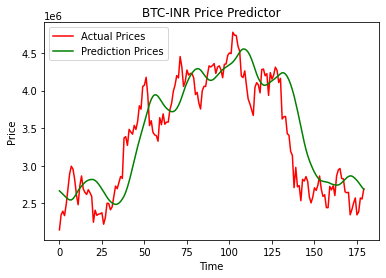

In [30]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()